Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [88]:
from random import random, seed
from itertools import product
from itertools import accumulate 
import numpy as np

from icecream import ic

from tqdm.auto import tqdm 
from matplotlib import pyplot as plt



## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [89]:
UNIVERSE_SIZE = 10_000
NUM_SETS = 1000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [90]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [91]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Have Fun!

In [92]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(np.True_, np.float64(4279763.506019733))

Improvement found at step 0: cost = 2132318.1637248597
Improvement found at step 1: cost = 2119411.6402642312
Improvement found at step 2: cost = 2106422.3444798924
Improvement found at step 3: cost = 2101670.909260862
Improvement found at step 4: cost = 2097530.4773828974
Improvement found at step 5: cost = 2089205.1128157647
Improvement found at step 6: cost = 2080553.7600416043
Improvement found at step 7: cost = 2072230.4023325667
Improvement found at step 8: cost = 2055321.9693337788
Improvement found at step 9: cost = 2042556.173660807
Improvement found at step 10: cost = 2033809.2749595062
Improvement found at step 11: cost = 2025412.5870544326
Improvement found at step 12: cost = 2016727.1744030663
Improvement found at step 13: cost = 2003533.2455872118
Improvement found at step 14: cost = 1982474.8611372141
Improvement found at step 15: cost = 1973897.510652244
Improvement found at step 17: cost = 1965442.760655787
Improvement found at step 18: cost = 1960935.294435071
Improve

ic| min_cost: np.float64(1632771.2679845244)
ic| history: [np.float64(2141437.2566907294),

Improvement found at step 56: cost = 1689574.435579537
Improvement found at step 57: cost = 1685205.2108753528
Improvement found at step 58: cost = 1680662.7204583734
Improvement found at step 59: cost = 1667681.2187506123
Improvement found at step 60: cost = 1667667.1147653628
Improvement found at step 61: cost = 1658799.8018325954
Improvement found at step 63: cost = 1650278.474983064
Improvement found at step 64: cost = 1641875.1481360046
Improvement found at step 65: cost = 1633471.8613094827



              np.float64(2132318.1637248597),
              np.float64(2119411.6402642312),
              np.float64(2106422.3444798924),
              np.float64(2101670.909260862),
              np.float64(2097530.4773828974),
              np.float64(2089205.1128157647),
              np.float64(2080553.7600416043),
              np.float64(2072230.4023325667),
              np.float64(2055321.9693337788),
              np.float64(2042556.173660807),
              np.float64(2033809.2749595062),
              np.float64(2025412.5870544326),
              np.float64(2016727.1744030663),
              np.float64(2003533.2455872118),
              np.float64(1982474.8611372141),
              np.float64(1973897.510652244),
              np.float64(1973897.510652244),
              np.float64(1965442.760655787),
              np.float64(1960935.294435071),
              np.float64(1948422.480552692),
              np.float64(1943923.9119783111),
              np.float64(1943764.1805584

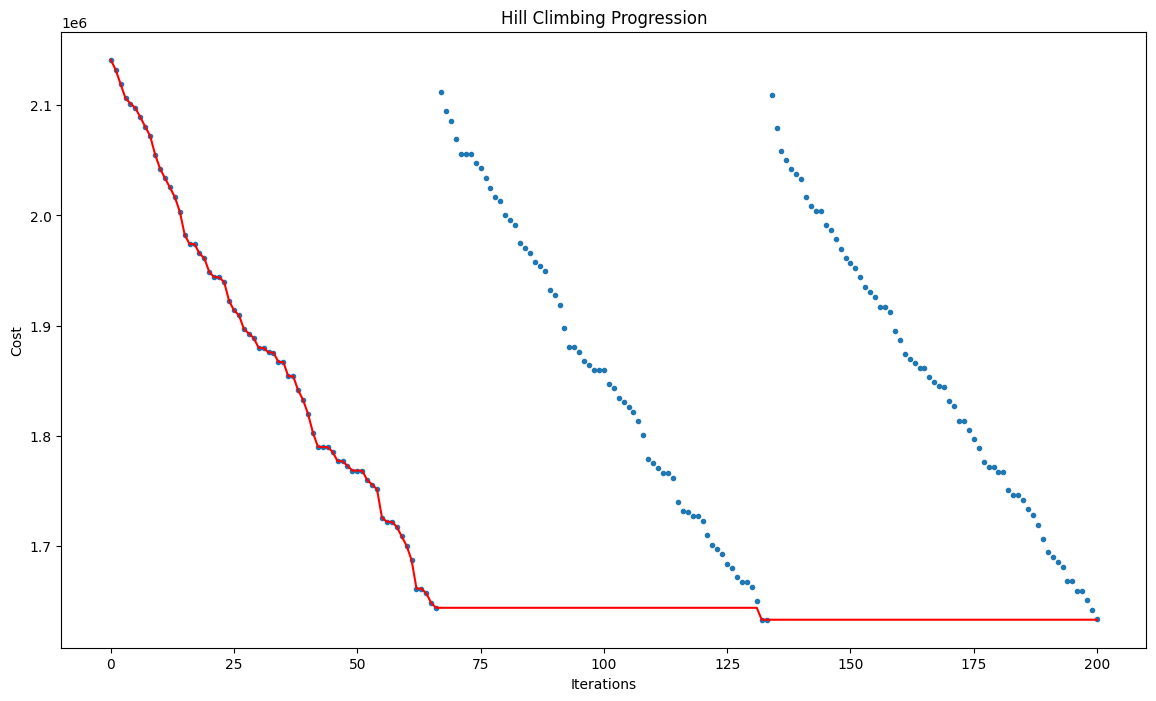

In [93]:
# Parametri di Hill Climbing
NUM_RESTARTS = 3  # Numero di tentativi per evitare minimi locali
STEEPEST_STEP_CANDIDATES = 5  # Numero di candidati per ogni passo
TRUE_MAX_STEPS = 1000 // STEEPEST_STEP_CANDIDATES  # Numero massimo di passi
history = list()  # Traccia dei costi delle soluzioni esplorate
best_solution = None  # La migliore soluzione trovata
min_cost = float('inf')  # Il costo minimo inizializzato all'infinito

# Funzione per fare un tweak (piccola modifica) alla soluzione corrente
def tweak(solution):
    new_solution = solution.copy()
    # Cambia un numero casuale di set (attivandoli/disattivandoli)
    for _ in range(np.random.randint(1, 10)):  # Cambia da 1 a 10 set casuali
        idx = np.random.randint(0, NUM_SETS)
        new_solution[idx] = not new_solution[idx]
    return new_solution

# Algoritmo Hill Climbing
for i in range(NUM_RESTARTS):
    # Inizializza una soluzione casuale
    solution = rng.random(NUM_SETS) < .5
    history.append(cost(solution))
    
    # Se la soluzione non è valida, continua a cercare finché non trovi una valida
    while not valid(solution):
        solution = rng.random(NUM_SETS) < .5

    for step in range(TRUE_MAX_STEPS // NUM_RESTARTS):
        # Genera candidati modificando leggermente la soluzione attuale (tweak)
        candidates = [tweak(solution) for _ in range(STEEPEST_STEP_CANDIDATES)]
        candidates = [c for c in candidates if valid(c)]  # Mantieni solo soluzioni valide

        # Se non ci sono candidati validi, passa al prossimo step
        if not candidates:
            continue

        # Valuta il costo dei candidati
        candidates_costs = [cost(c) for c in candidates]

        # Trova il miglior candidato in termini di costo
        best_candidate_idx = np.argmin(candidates_costs)
        best_candidate = candidates[best_candidate_idx]
        best_candidate_cost = candidates_costs[best_candidate_idx]

        # Se il candidato è migliore, accettalo come nuova soluzione
        if best_candidate_cost < cost(solution):
            solution = best_candidate
            history.append(best_candidate_cost)
            print(f"Improvement found at step {step}: cost = {best_candidate_cost}")
        else:
            history.append(cost(solution))  # Se non migliora, manteniamo la soluzione attuale

    # Aggiorna la soluzione migliore trovata finora
    current_cost = cost(solution)
    if current_cost < min_cost:
        min_cost = current_cost
        best_solution = solution

# Stampa i risultati finali
ic(min_cost)  # Stampa il costo minimo trovato
ic(history)

# Visualizzazione dell'evoluzione del costo
plt.figure(figsize=(14, 8))
plt.plot(range(len(history)), list(accumulate(history, min)), color="red")
plt.scatter(range(len(history)), history, marker=".")
plt.title("Hill Climbing Progression")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
